In [613]:
import pandas as pd
import numpy as np

In [614]:
data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [615]:
data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/14/22,8/15/22,8/16/22,8/17/22,8/18/22,8/19/22,8/20/22,8/21/22,8/22/22,8/23/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,189045,189343,189477,189710,190010,190254,190435,190643,191040,191247
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,321804,322125,322837,323282,323829,325241,325736,326077,326181,326787
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,269141,269269,269381,269473,269556,269650,269731,269805,269894,269971
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,45899,45899,45899,45975,45975,45975,45975,45975,45975,45975
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,102636,102636,102636,102636,102636,102636,102636,102636,102636,102636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,697447,697447,697447,697447,697447,697447,697447,697447,698384,698384
281,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
282,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11903,11903,11903,11903,11914,11915,11915,11915,11915,11917
283,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,331925,332014,332014,332264,332264,332264,332264,332264,332527,332527


In [616]:
confirmed_by_country_cumulative = data.groupby("Country/Region").sum()

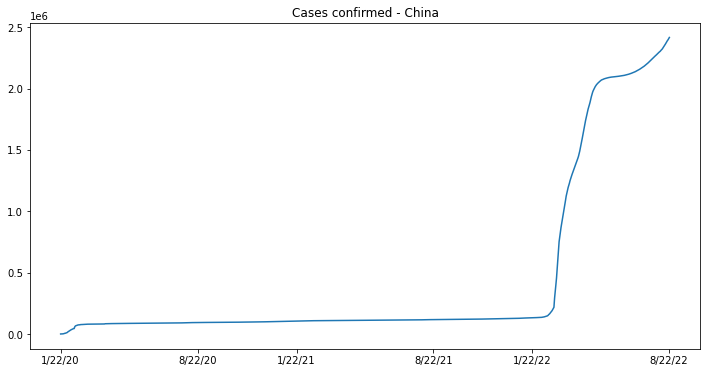

In [617]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 6))

ax.plot(confirmed_by_country_cumulative.loc['China'][2:]);

ax.set_title('Cases confirmed - China')

ax.set_xticks(['1/22/20', '8/22/20', '1/22/21','8/22/21','1/22/22', '8/22/22']);

In [618]:
confirmed_by_country_cumulative.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/14/22,8/15/22,8/16/22,8/17/22,8/18/22,8/19/22,8/20/22,8/21/22,8/22/22,8/23/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,189045,189343,189477,189710,190010,190254,190435,190643,191040,191247
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,321804,322125,322837,323282,323829,325241,325736,326077,326181,326787
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,269141,269269,269381,269473,269556,269650,269731,269805,269894,269971
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,45899,45899,45899,45975,45975,45975,45975,45975,45975,45975
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,102636,102636,102636,102636,102636,102636,102636,102636,102636,102636


## Case in China

In [619]:
confirmed_in_china = confirmed_by_country_cumulative.loc['China'][2:].diff().dropna()
confirmed_in_china

1/23/20       95.0
1/24/20      277.0
1/25/20      486.0
1/26/20      669.0
1/27/20      802.0
            ...   
8/19/22     9197.0
8/20/22     8517.0
8/21/22     6885.0
8/22/22    10064.0
8/23/22     8505.0
Name: China, Length: 944, dtype: float64

## Changing dataframe

In [620]:
confirmed_in_china = pd.DataFrame(
    confirmed_in_china, 
)
confirmed_in_china.reset_index(inplace= True)
confirmed_in_china.columns =  ['Date', 'Cases']

In [621]:
confirmed_in_china['Date'] = pd.to_datetime(confirmed_in_china['Date'])

## Grapfhic - Cases confirmed in China

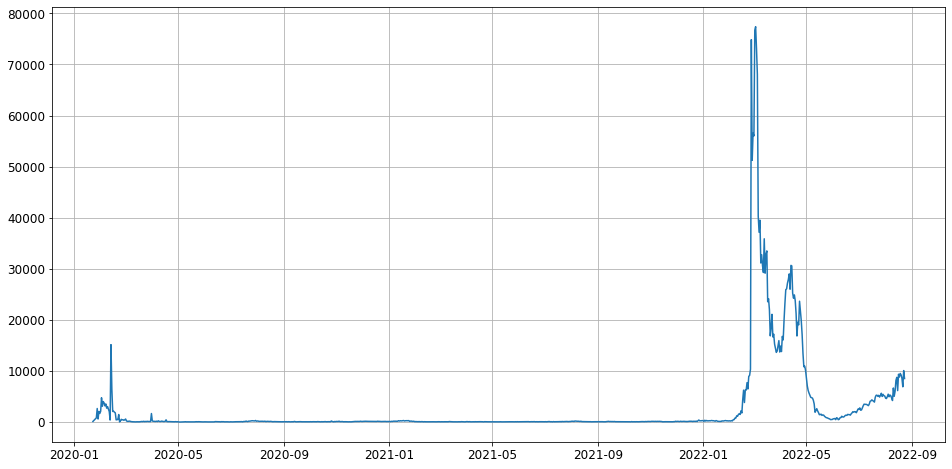

In [622]:
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (16, 8))

ax.plot(confirmed_in_china['Date'], confirmed_in_china['Cases'])

ax.tick_params(labelsize = 12)
ax.grid(True)

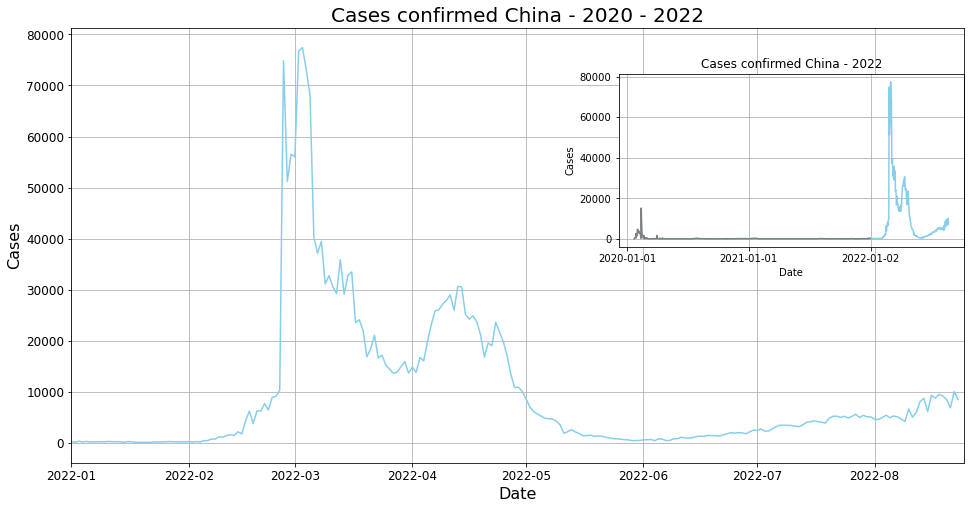

In [623]:
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (16, 8))
ax2 = fig.add_axes([0.6, 0.5, 0.3, 0.3])


ax.set_xlim(datetime(2022, 1, 1), datetime.now())
ax.plot(confirmed_in_china['Date'], confirmed_in_china['Cases'], color = 'skyblue')
ax.set_title('Cases confirmed China - 2020 - 2022', fontsize = 20)
ax.set_xlabel('Date', fontsize = 16)
ax.set_ylabel('Cases', fontsize = 16)
ax.tick_params(labelsize = 12)
ax.grid(True)


gray_right = confirmed_in_china['Date'] < datetime(2022, 1, 1)
ax2.plot(confirmed_in_china['Date'], confirmed_in_china['Cases'], color = 'skyblue')
ax2.plot(confirmed_in_china[gray_right]['Date'], confirmed_in_china[gray_right]['Cases'], color = 'gray')
ax2.set_title('Cases confirmed China - 2022', fontsize = 12)
ax2.set_xlabel('Date', fontsize = 10)
ax2.set_ylabel('Cases', fontsize = 10)
ax2.grid(True)
ax2.set_xticks(
    [date(2020, 1, 1) + timedelta(i * 366) for i in range(3)] 
);

## Confirmed on the last day

In [624]:
confirmed_by_country_cumulative.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/14/22,8/15/22,8/16/22,8/17/22,8/18/22,8/19/22,8/20/22,8/21/22,8/22/22,8/23/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,189045,189343,189477,189710,190010,190254,190435,190643,191040,191247
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,321804,322125,322837,323282,323829,325241,325736,326077,326181,326787
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,269141,269269,269381,269473,269556,269650,269731,269805,269894,269971
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,45899,45899,45899,45975,45975,45975,45975,45975,45975,45975
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,102636,102636,102636,102636,102636,102636,102636,102636,102636,102636


In [625]:
south_america = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 
    'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'
]

confirmed_in_south_america_yesterday = confirmed_by_country_cumulative.loc[south_america]
confirmed_in_south_america_yesterday = confirmed_in_south_america_yesterday.iloc[:, 2:].diff(axis = 1).dropna(axis = 1)
confirmed_in_south_america_yesterday = confirmed_in_south_america_yesterday.iloc[:, -1]


confirmed_in_south_america_yesterday = pd.DataFrame(confirmed_in_south_america_yesterday)
confirmed_in_south_america_yesterday.reset_index(inplace = True)
confirmed_in_south_america_yesterday.columns = ['Country', 'Cases_yesterday']
confirmed_in_south_america_yesterday


,Country,Cases_yesterday
0,Argentina,0
1,Bolivia,1338
2,Brazil,0
3,Chile,4541
4,Colombia,0
5,Ecuador,0
6,Guyana,26
7,Paraguay,0
8,Peru,5231
9,Suriname,15


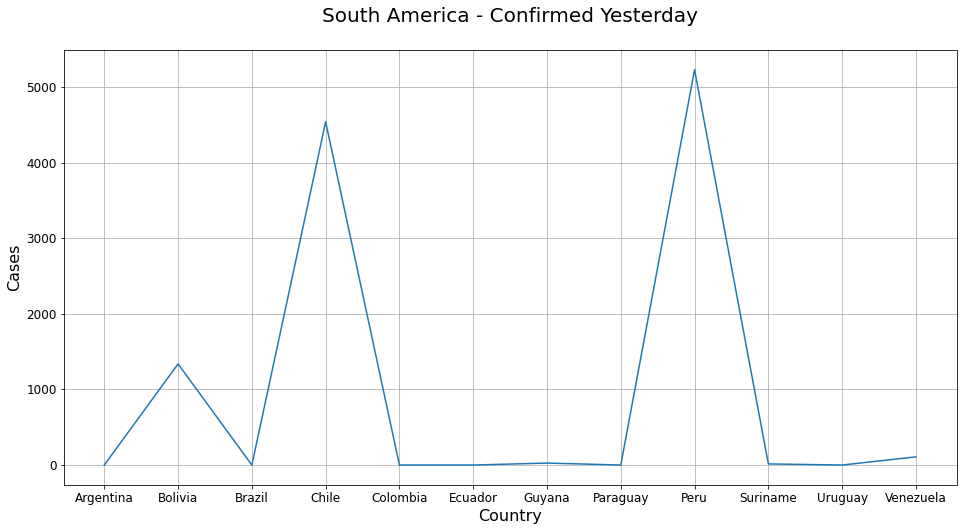

In [626]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 8))

ax.plot(confirmed_in_south_america_yesterday['Country'], confirmed_in_south_america_yesterday['Cases_yesterday'])
ax.set_title(f'South America - Confirmed Yesterday', fontsize = 20, y = 1.05)
ax.set_xlabel('Country', fontsize = 16)
ax.set_ylabel('Cases', fontsize = 16)

ax.tick_params(labelsize = 12)
ax.grid(True)

## Comparing categories

Text(Argentina, 968.25, 'Average')

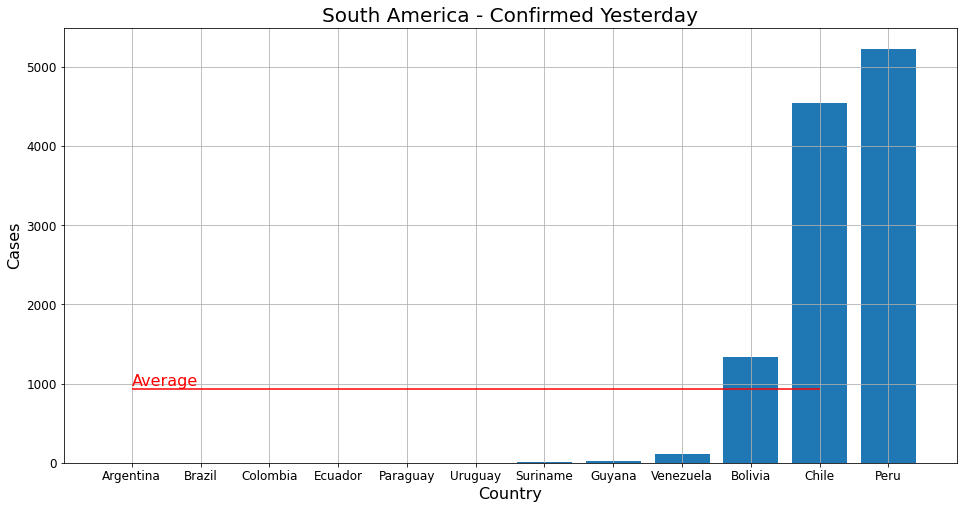

In [627]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 8))


ax.bar(
    data = confirmed_in_south_america_yesterday.sort_values(by = 'Cases_yesterday', ascending = True), 
    x = 'Country',
    height = 'Cases_yesterday'
)
ax.set_title(f'South America - Confirmed Yesterday', fontsize = 20)
ax.set_xlabel('Country', fontsize = 16)
ax.set_ylabel('Cases', fontsize = 16)

ax.grid(True)
ax.tick_params(labelsize = 12)
average = confirmed_in_south_america_yesterday['Cases_yesterday'].mean()
ax.hlines(
    y = average,
    xmin = 'Argentina', 
    xmax = 'Chile',
    color = 'r'
)
ax.annotate('Average', xy = ('Argentina', average + 30), fontsize = 16, color = 'r')